# Exploring Borrower Profile from a Peer-to-Peer Lending Platform
## by Rio Rinaldi

## Preliminary Wrangling

The Prosper dataset contains data of borrower profiles as well as their loan application. It contains an exhaustive list of information, ranging from income level, house ownership, employment status, credit limit, as well as information on the loan, such as the term, APR, estimated loss and gain, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.ticker import PercentFormatter

%matplotlib inline

In [2]:
df = pd.read_csv("prosperLoanData.csv")

df = df[["Term","BorrowerAPR","ProsperScore","EmploymentStatus","IsBorrowerHomeowner","DebtToIncomeRatio",
   "IncomeRange","Occupation","ListingCreationDate"]]

In [3]:
df.head(10)

,Term,BorrowerAPR,ProsperScore,EmploymentStatus,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,Occupation,ListingCreationDate
0,36,0.16516,NaN,Self-employed,True,0.17,"$25,000-49,999",Other,2007-08-26 19:09:29.263000000
1,36,0.12016,7.0,Employed,False,0.18,"$50,000-74,999",Professional,2014-02-27 08:28:07.900000000
2,36,0.28269,NaN,Not available,False,0.06,Not displayed,Other,2007-01-05 15:00:47.090000000
3,36,0.12528,9.0,Employed,True,0.15,"$25,000-49,999",Skilled Labor,2012-10-22 11:02:35.010000000
4,36,0.24614,4.0,Employed,True,0.26,"$100,000+",Executive,2013-09-14 18:38:39.097000000
5,60,0.15425,10.0,Employed,True,0.36,"$100,000+",Professional,2013-12-14 08:26:37.093000000
6,36,0.31032,2.0,Employed,False,0.27,"$25,000-49,999",Sales - Retail,2013-04-12 09:52:56.147000000
7,36,0.23939,4.0,Employed,False,0.24,"$25,000-49,999",Laborer,2013-05-05 06:49:27.493000000
8,36,0.07620,9.0,Employed,True,0.25,"$25,000-49,999",Food Service,2013-12-02 10:43:39.117000000
9,36,0.07620,11.0,Employed,True,0.25,"$25,000-49,999",Food Service,2013-12-02 10:43:39.117000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
Term                   113937 non-null int64
BorrowerAPR            113912 non-null float64
ProsperScore           84853 non-null float64
EmploymentStatus       111682 non-null object
IsBorrowerHomeowner    113937 non-null bool
DebtToIncomeRatio      105383 non-null float64
IncomeRange            113937 non-null object
Occupation             110349 non-null object
ListingCreationDate    113937 non-null object
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 7.1+ MB


In [5]:
df.describe()

,Term,BorrowerAPR,ProsperScore,DebtToIncomeRatio
count,113937.000000,113912.000000,84853.000000,105383.000000
mean,40.830248,0.218828,5.950067,0.275947
std,10.436212,0.080364,2.376501,0.551759
min,12.000000,0.006530,1.000000,0.000000
25%,36.000000,0.156290,4.000000,0.140000
50%,36.000000,0.209760,6.000000,0.220000
75%,36.000000,0.283810,8.000000,0.320000
max,60.000000,0.512290,11.000000,10.010000


### What is the structure of your dataset?
The dataset has around 113k rows where each row denotes a loan that was made with Prosper--a peer-to-peer lending company. The dataset contains around 80 columns, but for this dataset I have subsetted certain columns that would allow for further analysis. 

### What is/are the main feature(s) of interest in your dataset?
The dataset contains crucial information regarding the loan, such as the term, the APR, when loan was created, as well as information on the borrower, such as employment status, home ownership, income level, occupation, as well as a risk assessment number assigned by Prosper. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The subsetted data leads to a few interesting questions. How does a borrower get a high Prosper score? What is the average term and what does the borrower profile look like depending on how long they borrow? How does the borrower profile play a role into the APR the borrower receives?

## Univariate Exploration

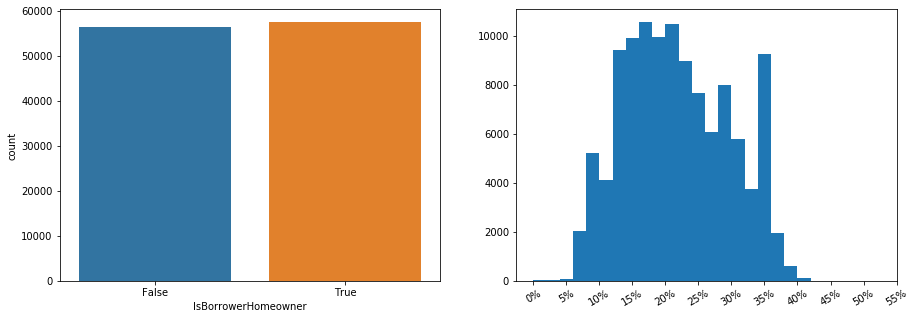

In [6]:
plt.figure(figsize = [15, 5])

# IsBorrowerHomeowner distribution
plt.subplot(1,2,1)
sb.countplot(data = df, x = "IsBorrowerHomeowner");

# BorrowerAPR distribution
plt.subplot(1,2,2)
bin_edges = np.arange(0, df['BorrowerAPR'].max() + 0.02, 0.02)
plt.hist(data = df, x = "BorrowerAPR", bins = bin_edges);
plt.xticks(np.arange(0, df['BorrowerAPR'].max() + 0.05, 0.05), rotation = 30);

ticks_pct = []

# below adds percent to the end
for i in plt.xticks()[0]:
    pct = i * 100
    pct = round(pct,0)
    pct = pct.astype(str)[:-2] # no decimal points
    pct = str(pct) + "%"
    ticks_pct.append(pct)

# get all the usual tick marks, replace them with the percent format we created above
plt.xticks(np.arange(0, df['BorrowerAPR'].max() + 0.05, 0.05), ticks_pct);

Homeowners look pretty equal. I had some bias in my mind thinking people that would borrrow were more likely to not have a home, but this shows it is not very true. 

For APR, it is disheartening to see that the marketed APR is generally something very low like 5% to 10%, but in reality most people get between 15% - 20%, with ann awkward jump around the 35% area. 

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


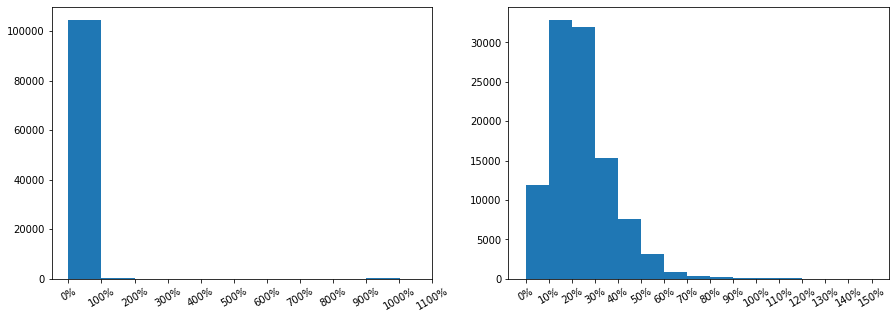

In [7]:
plt.figure(figsize = [15, 5])

# DebtToIncomeRatio distribution
plt.subplot(1,2,1)
bin_edges = np.arange(0, df['DebtToIncomeRatio'].max() + 1, 1)
plt.hist(data = df, x = "DebtToIncomeRatio");
plt.xticks(np.arange(0, df['DebtToIncomeRatio'].max() + 1, 1), rotation = 30);

ticks_pct = []

for i in plt.xticks()[0]:
    pct = i * 100
    pct = round(pct,0)
    pct = pct.astype(str)[:-2]
    pct = str(pct) + "%"
    ticks_pct.append(pct)
    
plt.xticks(np.arange(0, df['DebtToIncomeRatio'].max() + 1, 1), ticks_pct);

# DebtToIncomeRatio distribution (minus outliers)
# needed to make the second set (added 2 to each variable name)
plt.subplot(1,2,2)

dtir_100200 = df[df["DebtToIncomeRatio"] < 1.5]

bin_edges2 = np.arange(0, dtir_100200['DebtToIncomeRatio'].max() + 0.1, 0.1)
ax2 = plt.hist(data = df, x = "DebtToIncomeRatio", bins = bin_edges2);
ax2 = plt.xticks(np.arange(0, dtir_100200['DebtToIncomeRatio'].max() + 0.1, 0.1), rotation = 30);

ticks_pct = []

for i in plt.xticks()[0]:
    pct = i * 100
    pct = round(pct,0)
    pct = pct.astype(str)[:-2]
    pct = str(pct) + "%"
    ticks_pct.append(pct)
    
ax2 = plt.xticks(np.arange(0, dtir_100200['DebtToIncomeRatio'].max() + 0.1, 0.1), ticks_pct);

In both graphs I looked at Debt to Income Ratio to see who are those that borrow. As expected, there are a few people in very bad financial situations, and that severely skews our data. Thus, I recreated the graph but for those under 150% debt to income ratio. Conventional financial wisdom says that above 30% is high risk. Looks like the majority follow this rule.

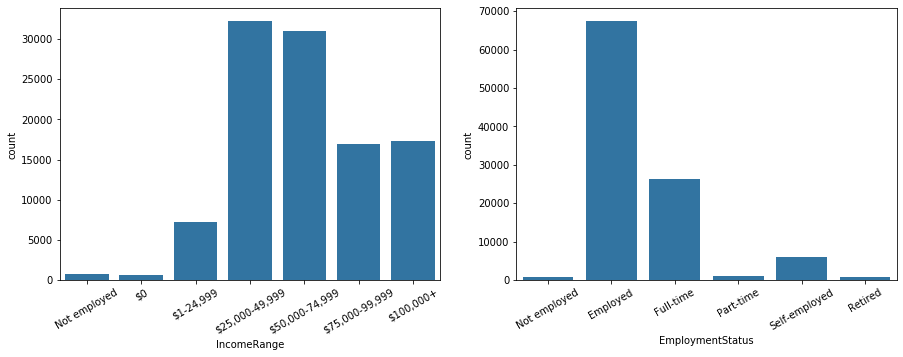

In [8]:
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]

# IncomeRange
plt.subplot(1,2,1)
income_order = ["Not employed","$0","$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"]
sb.countplot(data = df, x = "IncomeRange", color = base_color, order = income_order);
plt.xticks(rotation = 30);

# EmploymentStatus
plt.subplot(1,2,2)
employment_order = ["Not employed","Employed","Full-time","Part-time","Self-employed","Retired"]
sb.countplot(data = df, x = "EmploymentStatus", color = base_color, order = employment_order);
plt.xticks(rotation = 30);

It is understandable and expected that most of the loans were given to middle-class America, somewhere between the $25,000-49,999 range. However, it is still surprising that a lot of high-income earners also applied. I am wondering if the purposes of the loans were different. Also, maybe Prosper does not like to accept people with no income or very low income in the first place, which as understandable. 

As for employment status, it reflects the above, in the sense that the employed borrow more. It is good to see that those in retirement have not had to resort to borrowing. 

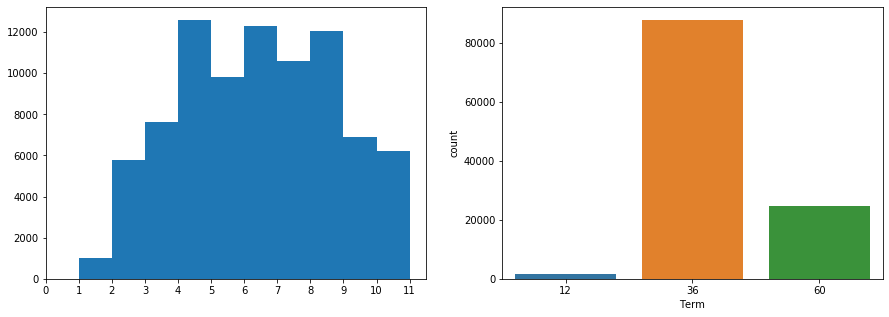

In [9]:
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]

# ProsperScore
plt.subplot(1,2,1)
bin_edges = np.arange(0, df['ProsperScore'].max() + 1, 1)
plt.hist(data = df, x = "ProsperScore");
plt.xticks(np.arange(0, df['ProsperScore'].max() + 1, 1));

# Term
plt.subplot(1,2,2)
sb.countplot(data = df, x = "Term");

Not much unusual here, most of the applicants carry intermediate risk, which is expected.

The length of the loan is on average is 36 months. Will be interesting to see how length impacts APR.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The Debt to Income Ratio was the only variable that showed up as maybe needing more transformation. However, given the extreme at 1000%, I doubt it will help much to transform into log. Let's look at if these outliers yield anything interesting. If not, we can just take values from 0% to 150% and use a log transformation there. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Same as above, none was needed except for Debt to Income Ratio.

## Bivariate Exploration

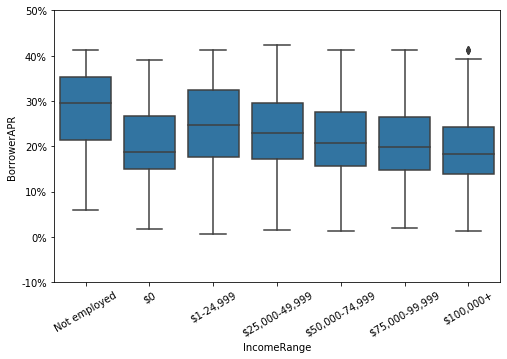

In [10]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]

# APR vs. IncomeRange
sb.boxplot(data = df, x = 'IncomeRange', y = 'BorrowerAPR', color = base_color, order = income_order)
plt.xticks(rotation = 30)

ticks_pct = []
locs = plt.yticks()[0]

# below adds percent to the end
for i in plt.yticks()[0]:
    pct = i * 100
    pct = round(pct,0)
    pct = pct.astype(str)[:-2] # no decimal points
    pct = str(pct) + "%"
    ticks_pct.append(pct)

# get all the usual tick marks, replace them with the percent format we created above
plt.yticks(locs, ticks_pct);

As expected, the more risky the loan, the higher the APR. Unemployed people get 30%, which is astronomically high. Oddly, $0, which I am honestly not really sure what that refers to, maybe students or unpaid interns? I am guessing they got favorable co-signers or positions that makes them less of a risk despite having no income?

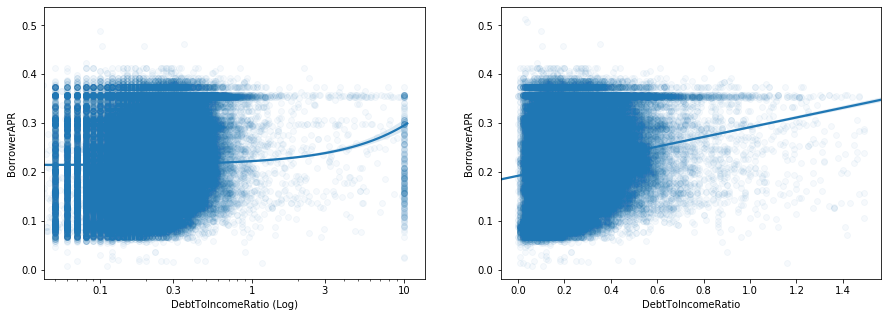

In [11]:
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]

# APR vs. DebtToIncomeRange
plt.subplot(1,2,1)
sb.regplot(data = df, x = 'DebtToIncomeRatio', y = 'BorrowerAPR', scatter_kws = {'alpha':0.04});
plt.xscale('log');
tick_locs = [0.1, 0.3, 1, 3, 10] 
plt.xticks(tick_locs, tick_locs);
plt.xlabel("DebtToIncomeRatio (Log)");

# APR vs. DebtToIncomeRange (minus outliers)
plt.subplot(1,2,2)
sb.regplot(data = dtir_100200, x = 'DebtToIncomeRatio', y = 'BorrowerAPR', scatter_kws = {'alpha':0.04});

My main takeaway from the first graph in regards to the relationship between BorrowerAPR and Debt to Income Ratio is that it doesn't play a very large role. Given that our results are heavily skewed by the extreme end of Debt to Income Ratio, I decided to not use those for now and recreate the graph.

Now we see a better picture on the second graph, in that a higher Debt to Income Ratio--which carries higher risk--does yield a higher APR. 

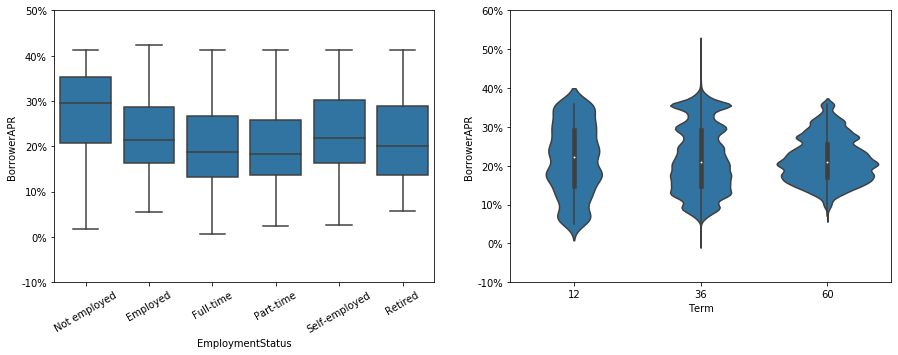

In [12]:
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]

# APR vs. Employment Status
plt.subplot(1,2,1)
sb.boxplot(data = df, x = 'EmploymentStatus', y = 'BorrowerAPR', color = base_color, order = employment_order);
plt.xticks(rotation = 30);

ticks_pct = []
locs = plt.yticks()[0]

# below adds percent to the end
for i in plt.yticks()[0]:
    pct = i * 100
    pct = round(pct,0)
    pct = pct.astype(str)[:-2] # no decimal points
    pct = str(pct) + "%"
    ticks_pct.append(pct)

# get all the usual tick marks, replace them with the percent format we created above
plt.yticks(locs, ticks_pct);

# APR vs. Term
plt.subplot(1,2,2)
sb.violinplot(data = df, x = 'Term', y = 'BorrowerAPR', color = base_color);

ticks_pct = []
locs = plt.yticks()[0]

# below adds percent to the end
for i in plt.yticks()[0]:
    pct = i * 100
    pct = round(pct,0)
    pct = pct.astype(str)[:-2] # no decimal points
    pct = str(pct) + "%"
    ticks_pct.append(pct)

# get all the usual tick marks, replace them with the percent format we created above
plt.yticks(locs, ticks_pct);

As for employment status, most of the trend makes sense. Higher risk (not employed) means higher borrower APR, where as full-time yields the lowest. An interesting find is that self-employed people still get higher borrower APR, meaning there might still be a stigma for self-employed workers despite them being more common in today's economy. 

For Term, I personally expected that longer terms would mean lower borrower APRs since the lender will obtain a higher return anyway from the longer duration. Instead, what we see is that the longest available term (60 months), offers a somewhat standard rate at 20%. Whereas the shorter term (12 months) I am guessing is more representative of the borrower profile instead of the term, hence a violin plot that is distributed somewhat uniformly. And 36 months shows a little of both worlds. 

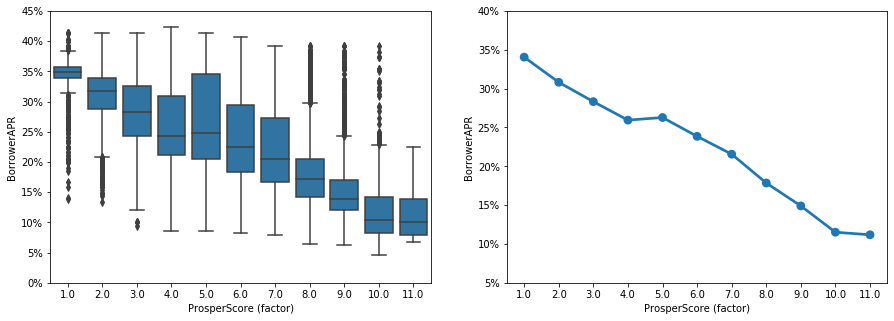

In [13]:
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]

# APR vs. ProsperScore (each distribution)
plt.subplot(1,2,1)
df['ProsperScore (factor)'] = df['ProsperScore'].astype(object) # making it into a factor
sb.boxplot(data = df, x = 'ProsperScore (factor)', y = 'BorrowerAPR', color = base_color);

ticks_pct = []
locs = plt.yticks()[0]

# below adds percent to the end
for i in plt.yticks()[0]:
    pct = i * 100
    pct = round(pct,0)
    pct = pct.astype(str)[:-2] # no decimal points
    pct = str(pct) + "%"
    ticks_pct.append(pct)

# get all the usual tick marks, replace them with the percent format we created above
plt.yticks(locs, ticks_pct);

# APR vs. ProsperScore (overall trend)
plt.subplot(1,2,2)
sb.pointplot(data = df, x = 'ProsperScore (factor)', y = 'BorrowerAPR');

ticks_pct = []
locs = plt.yticks()[0]

# below adds percent to the end
for i in plt.yticks()[0]:
    pct = i * 100
    pct = round(pct,0)
    pct = pct.astype(str)[:-2] # no decimal points
    pct = str(pct) + "%"
    ticks_pct.append(pct)

# get all the usual tick marks, replace them with the percent format we created above
plt.yticks(locs, ticks_pct);

As expected, the internal scoring system they use is strongly correlated with the borrower APR that is given. What's interesting is the numerous outliers that can be found on the lower end and higher end of the scorinng system. Would be interesting to see if we can find any patterns into why someone might be assigned a high score but also a high APR, and vice versa. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Some of the interesting relationships found was that we were able to confirm that higher risk, in general, means higher borrower APR. We also found it interesting that self-employment was found risky, and that longer terms of the loan was associated with a more standard distribution of borrower APR, whereas shorter terms were more uniformly distributed and per our guess, means it is more reflective of the borrower profile instead. We also confirmed that the internal Prosper Score was very highly correlated to borrower APR. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Not really.

## Multivariate Exploration

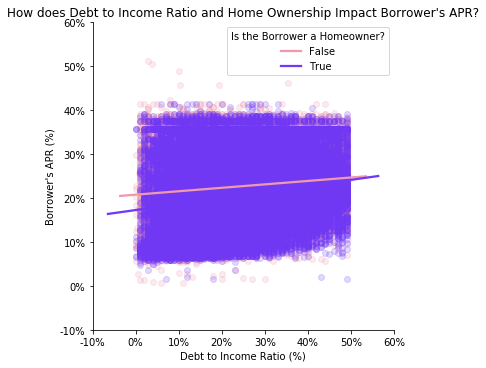

In [14]:
# DebtToIncomeRatio vs. BorrowerAPR, Colored by IsBorrrowerHomeowner
# Too overcrowded, let's use resampling to get a smaller amount
dtir_100200_sample = dtir_100200.copy()
dtir_100200_sample = dtir_100200.sample(10000)
dtir_50 = dtir_100200[dtir_100200["DebtToIncomeRatio"] < 0.5]
dtir_50_sample = dtir_50.sample(10000)

# assign manual color
homeowner_color = ['#ee99ac', '#7038f8']

sb.lmplot(data = dtir_50, x = 'DebtToIncomeRatio', y = 'BorrowerAPR', scatter_kws = {'alpha':0.2},
          hue = "IsBorrowerHomeowner", legend = False, palette = homeowner_color);
plt.legend(title='Is the Borrower a Homeowner?', labels=['False','True']);
plt.title("How does Debt to Income Ratio and Home Ownership Impact Borrower's APR?");

ticks_pct = []
locs = plt.yticks()[0]

# below adds percent to the end
for i in plt.yticks()[0]:
    pct = i * 100
    pct = round(pct,0)
    pct = pct.astype(str)[:-2] # no decimal points
    pct = str(pct) + "%"
    ticks_pct.append(pct)

# get all the usual tick marks, replace them with the percent format we created above
plt.yticks(locs, ticks_pct);

ticks_pct = []
locs_x = plt.xticks()[0]

for i in plt.xticks()[0]:
    pct = i * 100
    pct = round(pct,0)
    pct = pct.astype(str)[:-2]
    pct = str(pct) + "%"
    ticks_pct.append(pct)
    
plt.xticks(locs_x, ticks_pct);
plt.ylabel("Borrower's APR (%)");
plt.xlabel("Debt to Income Ratio (%)");

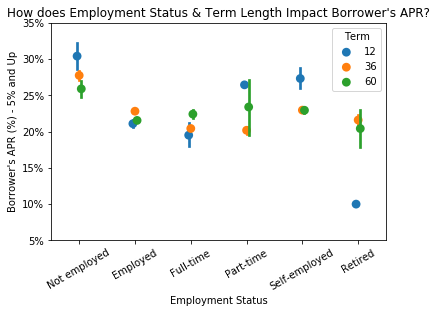

In [15]:
# EmploymentStatus vs. BorrowerAPR, Colored by Term
ax = sb.pointplot(data = df, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'Term', lodge=0.4, 
                  order = employment_order, dodge = True, linestyles='');
plt.xticks(rotation = 30);

ticks_pct = []
locs = plt.yticks()[0]

# below adds percent to the end
for i in plt.yticks()[0]:
    pct = i * 100
    pct = round(pct,0)
    pct = pct.astype(str)[:-2] # no decimal points
    pct = str(pct) + "%"
    ticks_pct.append(pct)

# get all the usual tick marks, replace them with the percent format we created above
plt.yticks(locs, ticks_pct);

plt.title("How does Employment Status & Term Length Impact Borrower's APR?");
plt.ylabel("Borrower's APR (%) - 5% and Up");
plt.xlabel("Employment Status");

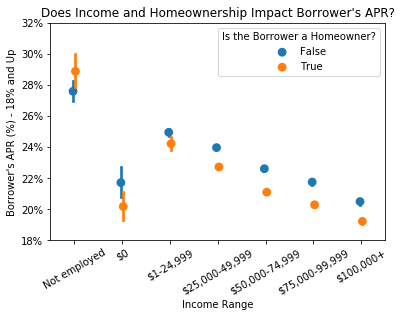

In [16]:
# IncomeRange vs. BorrowerAPR, Colored by Homeowner
ax = sb.pointplot(data = df, x = 'IncomeRange', y = 'BorrowerAPR', hue = 'IsBorrowerHomeowner', lodge=0.4, 
                  order = income_order, dodge = True, linestyles='');
plt.legend(title='Is the Borrower a Homeowner?');
plt.xticks(rotation = 30);

ticks_pct = []
locs = plt.yticks()[0]

# below adds percent to the end
for i in plt.yticks()[0]:
    pct = i * 100
    pct = round(pct,0)
    pct = pct.astype(str)[:-2] # no decimal points
    pct = str(pct) + "%"
    ticks_pct.append(pct)

# get all the usual tick marks, replace them with the percent format we created above
plt.yticks(locs, ticks_pct);

plt.title("Does Income and Homeownership Impact Borrower's APR?");
plt.xlabel("Income Range");
plt.ylabel("Borrower's APR (%) - 18% and Up");

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We saw a weak relationship that being a homeowner actually slightly increases your APR, given debt to income ratio. However, was likely because people that had a lot of debt tended to be homeowners. I thus recreated the graph but only looking less than 50% Debt to Income Ratio.

As for employment status and loan term length, it looks like if you are not high risk, then a shorter term length means lower APR. However, if you are high risk, a short term loan seems like a worse choice. 60 months also have a wider distribution of APRs. 

For income and homeownership, we saw a clear relationship. We found that having a home is a valuable asset and on average, does reduce your APR. This applies for all income levels except if you are unemployed, in which maybe having a home can be seen as risk because you have to continue paying mortgage payments orr risk losing the house. 

### Were there any interesting or surprising interactions between features?

Same as above.